Done. You have the matrices PP QQ  RR  SS  WW.
 
PP
(1, 1)
[[0.932]]
 
RR
(5, 1)
[[ 0.475]
 [ 0.01 ]
 [-0.465]
 [-0.034]
 [-1.701]]
 
QQ
(1, 1)
[[0.259]]
 
SS
(5, 1)
[[ 0.796]
 [ 2.837]
 [ 2.041]
 [ 0.099]
 [10.347]]
 
  
Done. You have the matrices "Resp_mat" and "Resp_mat_named" 
which contains impulse reponses to 1% innovations
for all exogenous stochastic processes in the model.
If you want, you can download these into an excel file
or use them to make plots.
   
Resp_mat_named = 
[['Period' '0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0'
  '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '17.0' '18.0' '19.0'
  '20.0' '21.0' '22.0' '23.0' '24.0' '25.0' '26.0' '27.0' '28.0' '29.0'
  '30.0' '31.0' '32.0' '33.0' '34.0' '35.0' '36.0' '37.0' '38.0' '39.0'
  '40.0' '41.0' '42.0' '43.0' '44.0' '45.0' '46.0' '47.0' '48.0']
 ['capital' '0.2586709536338279' '0.48755994124957514'
  '0.6892642629454928' '0.866177929565117' '1.0205067179328484'
  '1.1542821462915303' '1.269374445861

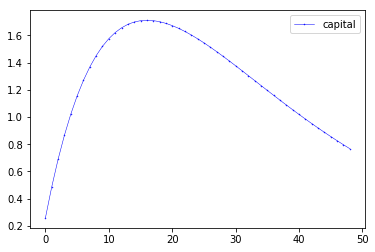

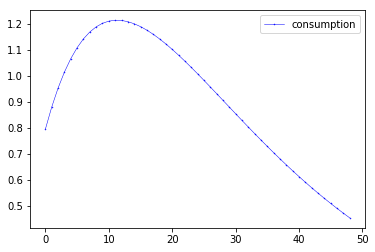

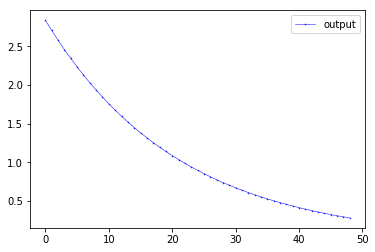

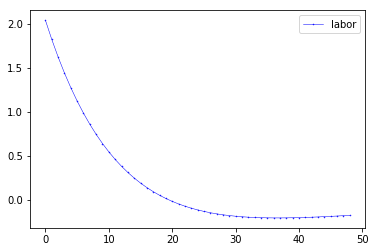

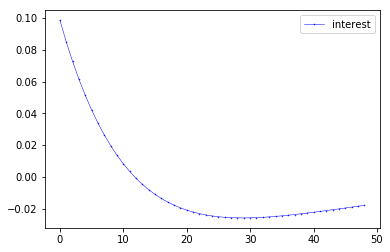

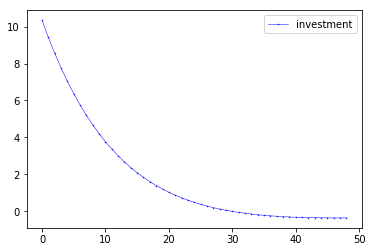

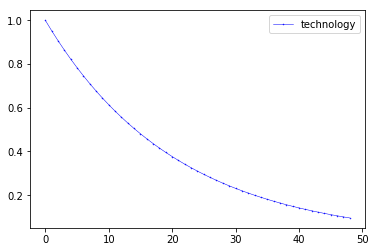

Set of Impulse Responses
x-axis: time periods,  y-axis:  %-deviation from steady state


In [3]:
#   Uhlig's Exampl04.m  Model 2
#   This is  "Economy 2" from Farmer, R.E.A. 
#   and J.T. Guo, "Real Business Cycles and the 
#   Animal Spirits Hypothesis," Journal of Economic 
#  Theory 63, 42-72 (1994).

#  Exampl05  is set-up correctly compared to
#  Exampl04.  Uhlig introduced an additional
#  state variable c(t) in Exampl05

###  NOTE NOTE
### Py and MAT results match for Models 1 and ,
### but not model 3
###  differences in eigenvalues matter in Model 3


import numpy as np


#  These are the parameters for  
#  Farmer-Guo Model 2  

lamb = 0.7
b = 0.63
a = 0.30                
psi =1.0/1.05 
sigma_sigma = 0.465

L_bar = 1.0/3
Z_bar = 1
delta = 0.025
rho = 0.99
eta = 1.0


alpha   = a/lamb
betta   = b/lamb  
R_bar = 1.0/rho
YK_bar = (R_bar + delta - 1)/a
K_bar = (YK_bar / (Z_bar*L_bar**betta) )**(1.0/(alpha-1))
I_bar = delta * K_bar
Y_bar = YK_bar * K_bar
C_bar = Y_bar - delta*K_bar
A_bar = C_bar**(-eta) * b * Y_bar/L_bar # Parameter in utility function
     
        

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']



AA = np.vstack(([0],
                          [- K_bar],
                          [0],
                          [0],
                          [0]))

BB = np.vstack(([0],
                          [(1-delta)*K_bar],
                          [alpha],
                          [0],
                          [-a*YK_bar]))

CC = np.vstack(([-C_bar, Y_bar, 0, 0, -I_bar],
                           [0, 0, 0, 0, I_bar],
                           [0, -1, betta, 0, 0],
                           [-eta, 1, -1, 0, 0],
                           [0, a*YK_bar, 0, -R_bar, 0]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [0]

GG = [0]

HH = [0]

JJ = [-eta, 0, 0, 1, 0]

KK = [eta, 0, 0, 0, 0]

LL = [0]

MM = [0]

NN = [psi]


Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run uhlig_solver_abreviated.ipynb


print(' ')
print('PP')
print(PP.shape)
print(PP)
print(' ')
print('RR')
print(RR.shape)
print(RR)
print(' ')
print('QQ')
print(QQ.shape)
print(QQ)
print(' ')
print('SS')
print(SS.shape)
print(SS)
print(' ')


%run Uhlig_impulse_resp_all.ipynb

%run Uhlig_plot_impresp_all.ipynb


